In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Diwali Sales Data.csv', encoding='Unicode_escape')

# Data Cleaning

In [3]:
df.shape

(11251, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [6]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [7]:
df = df.drop(['unnamed1', 'Status'], axis=1)

In [8]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
df.dropna(inplace=True, axis=0)

In [10]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [11]:
df['Amount'].dtype

dtype('float64')

In [12]:
df['Amount'] = df['Amount'].astype(int)

In [13]:
df['Amount'].dtype

dtype('int64')

In [14]:
df.duplicated().sum()

np.int64(8)

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.duplicated().sum()

np.int64(0)

# Exploratory Data Analysis

/var/folders/2d/8hk7zdn135qcfnl79rblqtb80000gn/T/ipykernel_29400/3408517660.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Gender', data=df, palette=['green', 'yellow'])


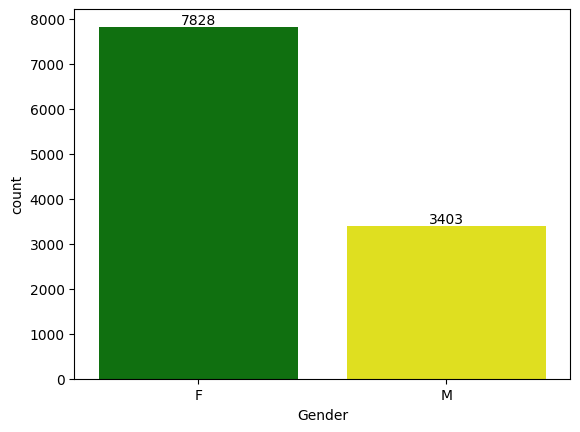

In [17]:
ax = sns.countplot(x='Gender', data=df, palette=['green', 'yellow'])
for label in ax.containers:
    ax.bar_label(label)

/var/folders/2d/8hk7zdn135qcfnl79rblqtb80000gn/T/ipykernel_29400/2261424635.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Amount', data=sales_gender.reset_index(), palette=['green', 'yellow'])


<Axes: xlabel='Gender', ylabel='Amount'>

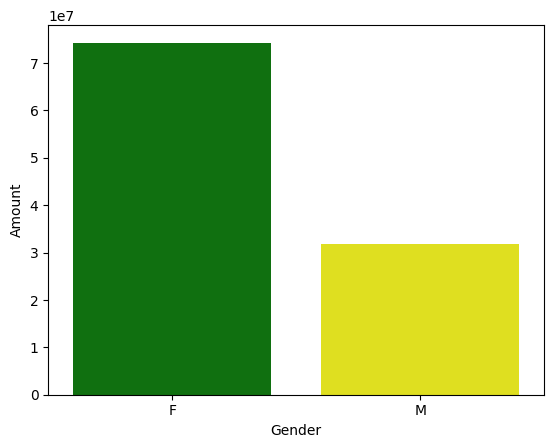

In [18]:
sales_gender = df.groupby('Gender')['Amount'].sum().sort_values(ascending=False)
sns.barplot(x='Gender', y='Amount', data=sales_gender.reset_index(), palette=['green', 'yellow'])


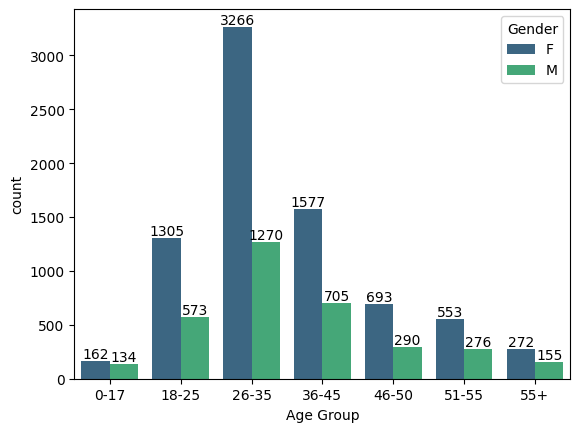

In [19]:
age_group_order = sorted(df['Age Group'].unique())
ax = sns.countplot(x='Age Group', data=df, palette='viridis', hue='Gender', order=age_group_order)

for label in ax.containers:
    ax.bar_label(label)

<Axes: xlabel='Age Group', ylabel='Amount'>

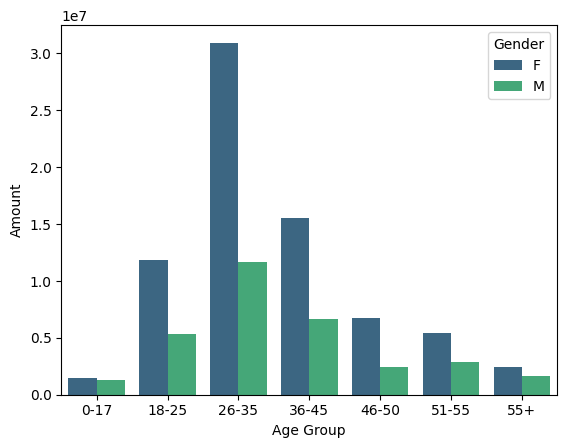

In [20]:
sales_age_group = df.groupby(['Age Group', 'Gender'])['Amount'].sum().sort_values(ascending=False).reset_index()
sns.barplot(x='Age Group', y='Amount', hue='Gender', palette='viridis', data=sales_age_group, order=age_group_order)

In [21]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

/var/folders/2d/8hk7zdn135qcfnl79rblqtb80000gn/T/ipykernel_29400/763934725.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Orders', x='State', data=orders_state.reset_index(), palette='viridis')


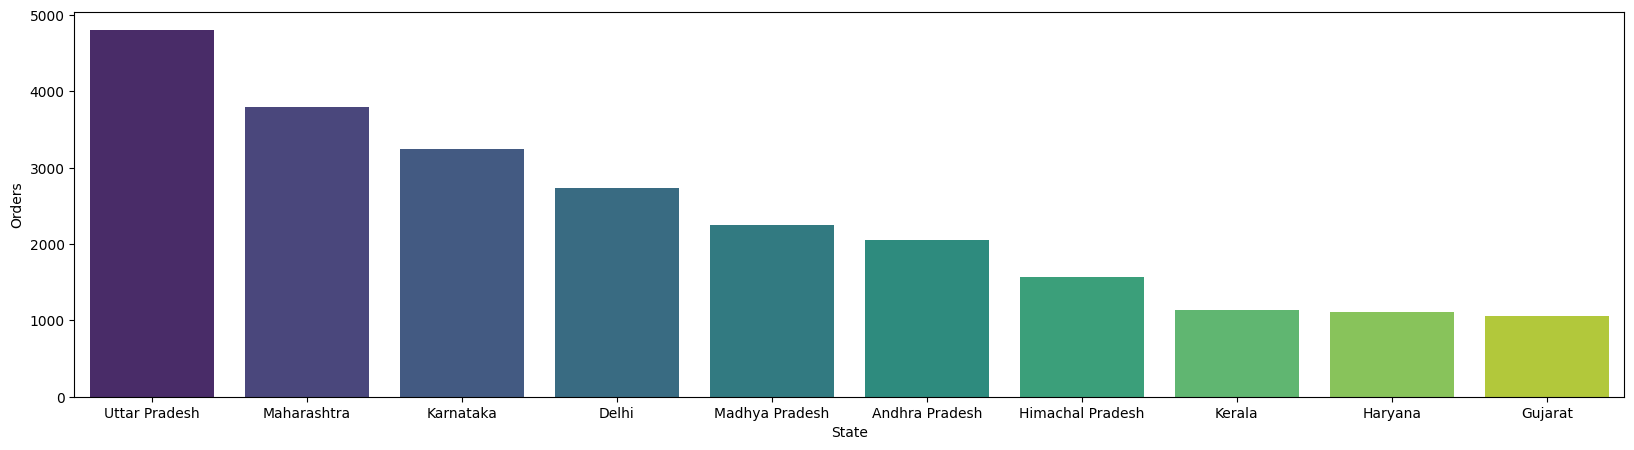

In [22]:
plt.figure(figsize=(20, 5))
orders_state = df.groupby('State')['Orders'].sum().sort_values(ascending=False).head(10)
sns.barplot(y='Orders', x='State', data=orders_state.reset_index(), palette='viridis')
plt.show()

<Axes: xlabel='State', ylabel='Amount'>

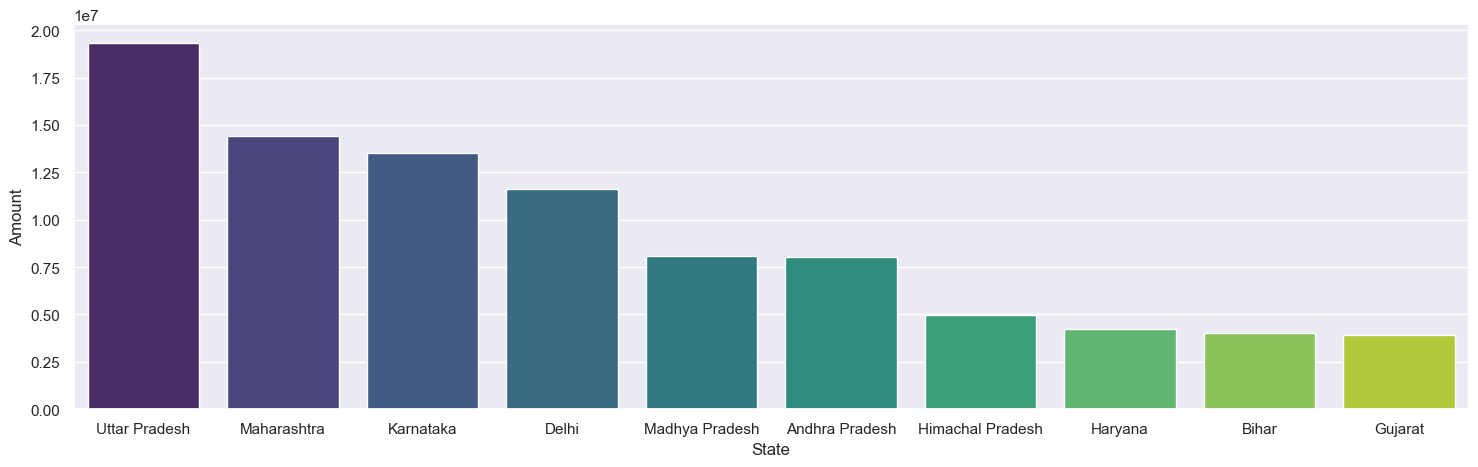

In [23]:
sales_state = df.groupby('State')['Amount'].sum().sort_values(ascending=False).head(10)
sns.set(rc={'figure.figsize': (18, 5)})
sns.barplot(y='Amount', x='State', hue='State', data=sales_state.reset_index(), palette='viridis', dodge=False, legend=False)


In [24]:
df['Marital_Status']

0        0
1        1
2        1
3        0
4        1
        ..
11246    1
11247    0
11248    0
11249    0
11250    0
Name: Marital_Status, Length: 11231, dtype: int64

In [25]:
df['Marital_Status2'] = df['Marital_Status'].map({1: 'Married', 0: 'Unmarried'})

In [26]:
df['Marital_Status2']

0        Unmarried
1          Married
2          Married
3        Unmarried
4          Married
           ...    
11246      Married
11247    Unmarried
11248    Unmarried
11249    Unmarried
11250    Unmarried
Name: Marital_Status2, Length: 11231, dtype: object

In [27]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Marital_Status2'],
      dtype='object')

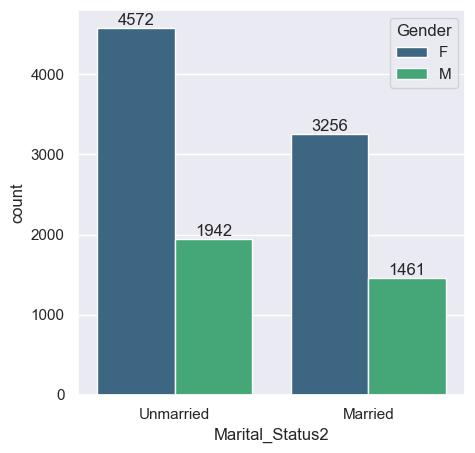

In [28]:
sns.set(rc={'figure.figsize': (5, 5)})
ax = sns.countplot(x='Marital_Status2', data=df, palette='viridis', hue='Gender')

for bars in ax.containers:
    ax.bar_label(bars)

In [29]:
df.groupby(['Marital_Status2','Gender'])['Amount'].sum().sort_values(ascending=False)

Marital_Status2  Gender
Unmarried        F         43778558
Married          F         30529121
Unmarried        M         18320176
Married          M         13550970
Name: Amount, dtype: int64

<Axes: xlabel='Marital_Status2', ylabel='Amount'>

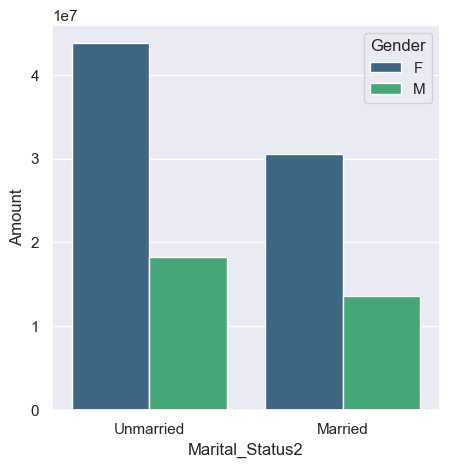

In [31]:
marital_status_sales = df.groupby(['Marital_Status2','Gender'])['Amount'].sum().sort_values(ascending=False).reset_index()
sns.barplot(x='Marital_Status2', y='Amount', data=marital_status_sales, palette='viridis', hue='Gender')

/var/folders/2d/8hk7zdn135qcfnl79rblqtb80000gn/T/ipykernel_29400/535246804.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax  = sns.countplot(x = 'Occupation', data = df, palette = 'viridis')


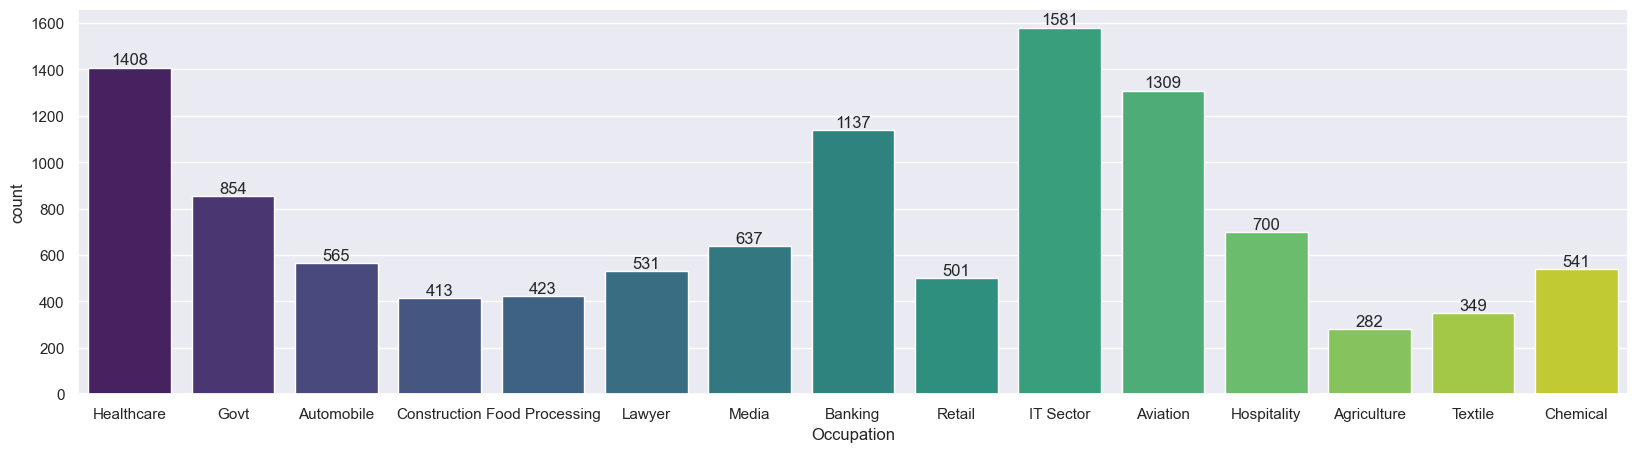

In [32]:
sns.set(rc = {'figure.figsize':(20,5)})
ax  = sns.countplot(x = 'Occupation', data = df, palette = 'viridis')
for labels in ax.containers:
    ax.bar_label(labels)

<Axes: xlabel='Occupation', ylabel='Amount'>

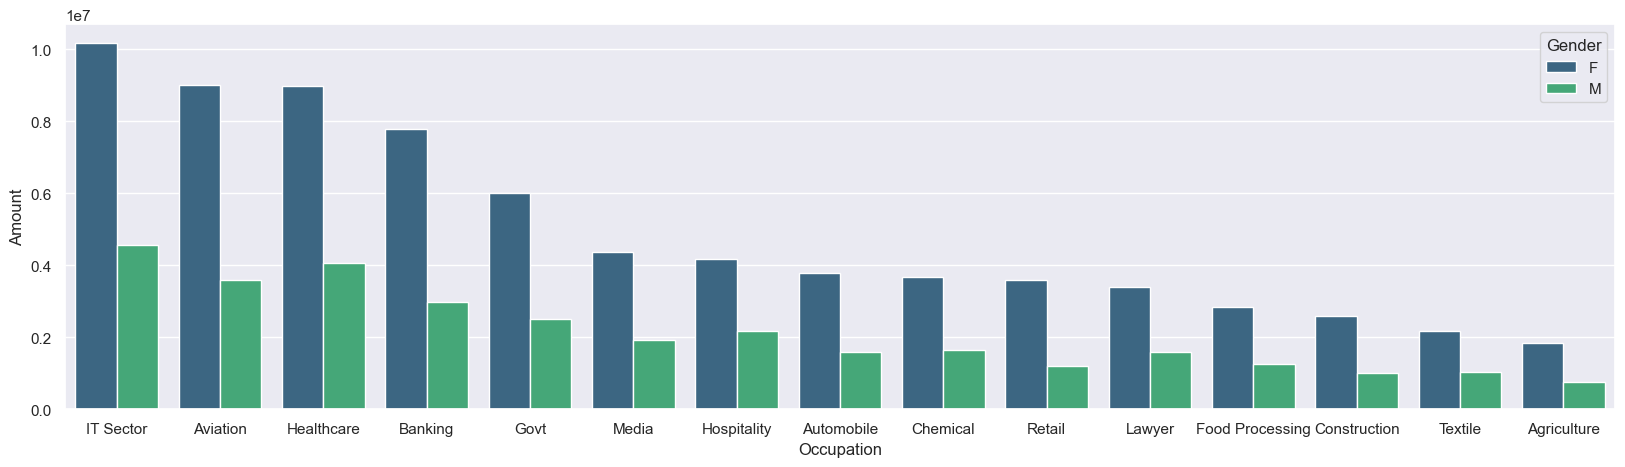

In [33]:
occupation_sales = df.groupby(['Occupation','Gender'])['Amount'].sum().sort_values(ascending = False)
sns.barplot(y = 'Amount', x = 'Occupation', data = occupation_sales.reset_index(), palette = 'viridis', hue='Gender')

In [34]:
df['Product_Category'].unique()

array(['Auto', 'Hand & Power Tools', 'Stationery', 'Tupperware',
       'Footwear & Shoes', 'Furniture', 'Food', 'Games & Toys',
       'Sports Products', 'Books', 'Electronics & Gadgets', 'Decor',
       'Clothing & Apparel', 'Beauty', 'Household items', 'Pet Care',
       'Veterinary', 'Office'], dtype=object)

In [35]:
df['Product_Category'].value_counts().index

Index(['Clothing & Apparel', 'Food', 'Electronics & Gadgets',
       'Footwear & Shoes', 'Household items', 'Beauty', 'Games & Toys',
       'Sports Products', 'Furniture', 'Pet Care', 'Office', 'Stationery',
       'Books', 'Decor', 'Auto', 'Veterinary', 'Tupperware',
       'Hand & Power Tools'],
      dtype='object', name='Product_Category')

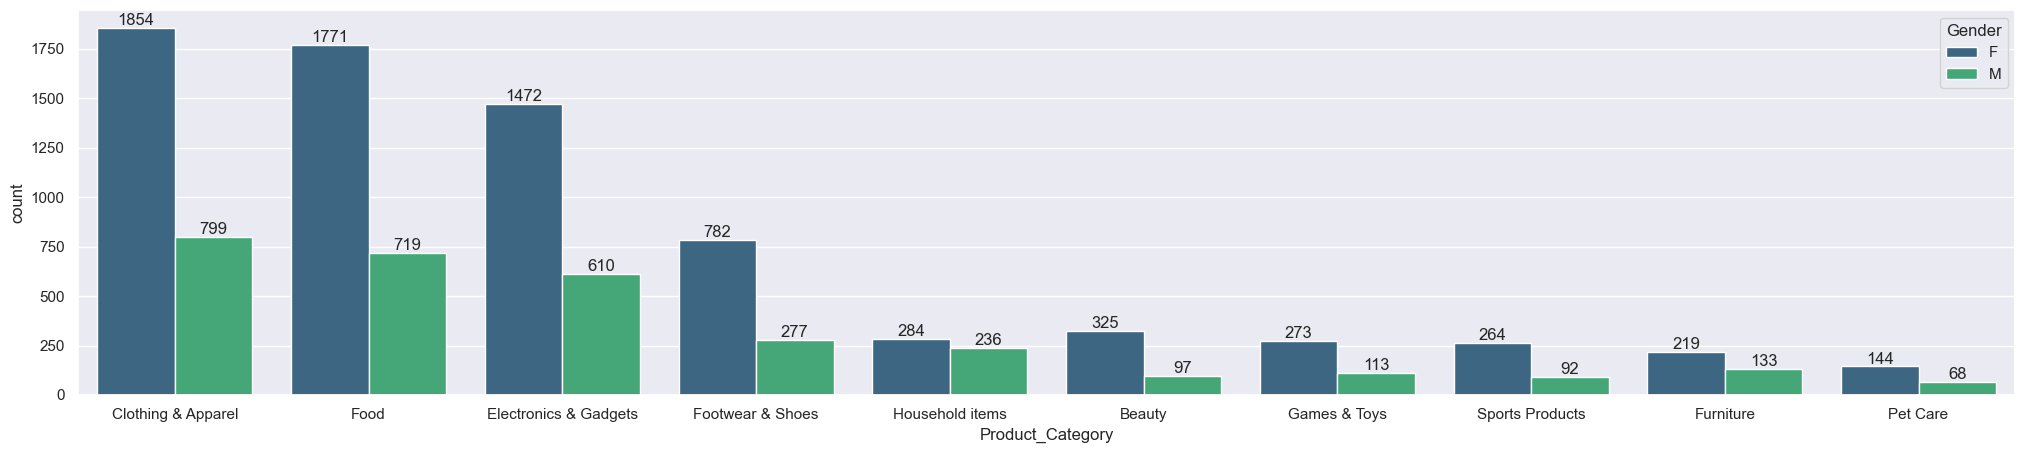

In [36]:
top_10_product_categories = df['Product_Category'].value_counts().index[:10]
sns.set(rc={'figure.figsize': (25, 5)})
ax = sns.countplot(x='Product_Category', data=df, palette='viridis', hue='Gender', order=top_10_product_categories)
for labels in ax.containers:
    ax.bar_label(labels)

In [37]:
df.groupby(['Product_Category','Gender'])['Amount'].sum().sort_values(ascending=False).head(10)

Product_Category       Gender
Food                   F         24176102
Footwear & Shoes       F         11534547
Clothing & Apparel     F         11479103
Electronics & Gadgets  F         11004923
Food                   M          9757781
Clothing & Apparel     M          5005369
Electronics & Gadgets  M          4602734
Footwear & Shoes       M          4040662
Furniture              F          3394642
Games & Toys           F          3045258
Name: Amount, dtype: int64

/var/folders/2d/8hk7zdn135qcfnl79rblqtb80000gn/T/ipykernel_29400/414728934.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = 'Amount', x = 'Product_Category', data = product_category_sales.reset_index(), palette = 'viridis')


<Axes: xlabel='Product_Category', ylabel='Amount'>

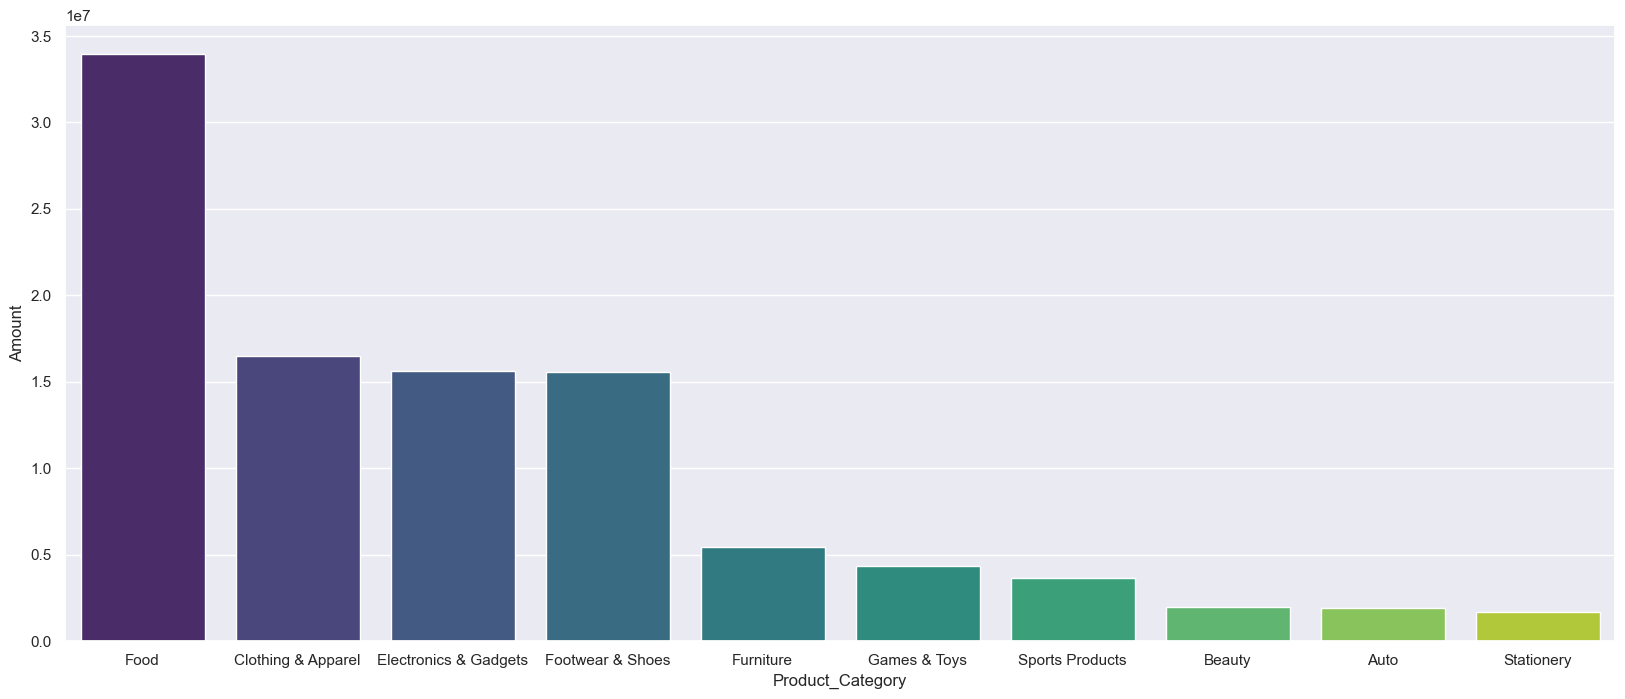

In [38]:
sns.set(rc = {'figure.figsize':(20,8)})
product_category_sales = df.groupby(['Product_Category'])['Amount'].sum().sort_values(ascending=False).head(10)
sns.barplot(y = 'Amount', x = 'Product_Category', data = product_category_sales.reset_index(), palette = 'viridis')

/var/folders/2d/8hk7zdn135qcfnl79rblqtb80000gn/T/ipykernel_29400/1451771230.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = 'Orders', x = 'Product_ID', data = product_sales.reset_index(), palette = 'viridis')


<Axes: xlabel='Product_ID', ylabel='Orders'>

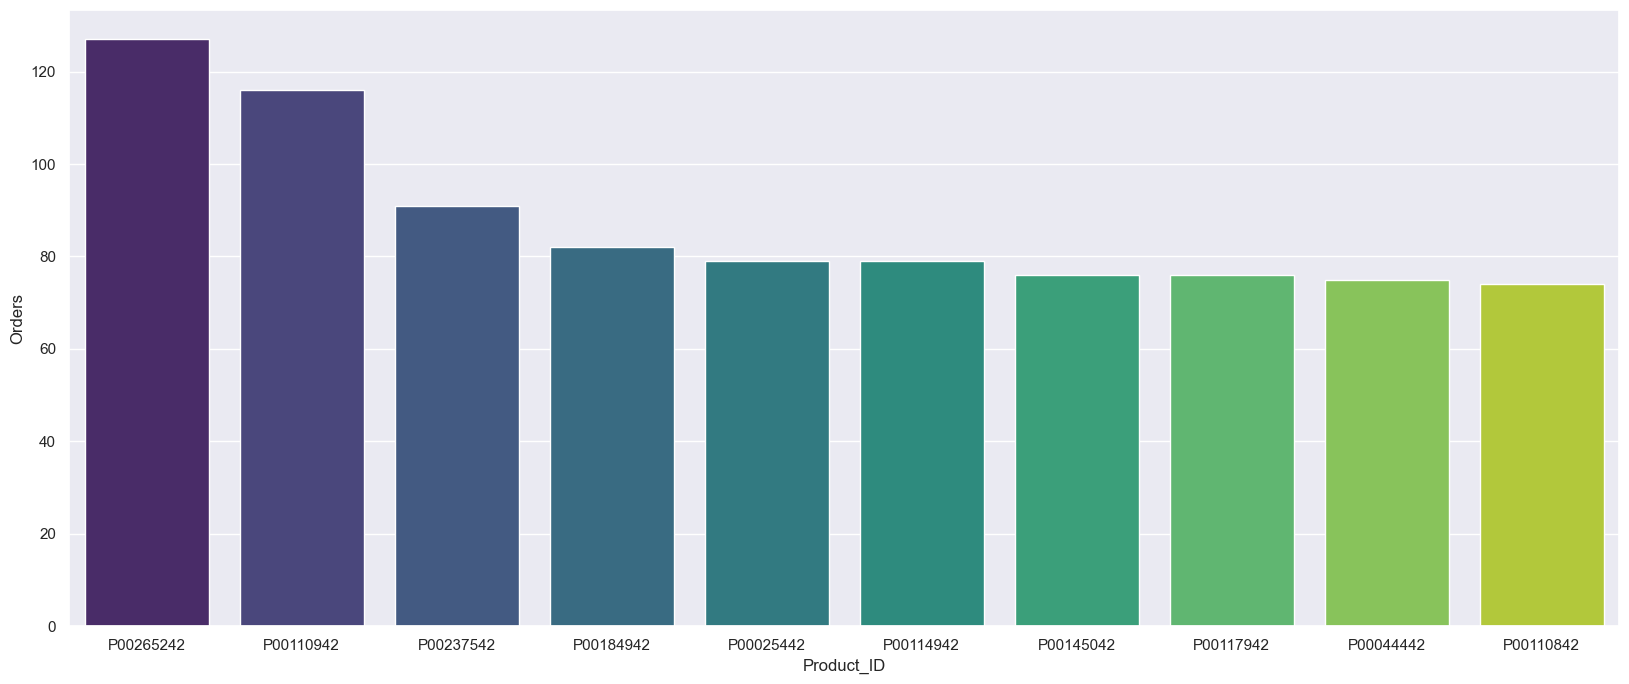

In [39]:
product_sales = df.groupby(['Product_ID'])['Orders'].sum().sort_values(ascending=False).head(10)
sns.barplot(y = 'Orders', x = 'Product_ID', data = product_sales.reset_index(), palette = 'viridis')